In [1]:
import requests
import chess.pgn
import io
url = 'https://lichess.org/api/games/user/DrDrunkenstein?max=100&pgnInJson=TRUE'
response = requests.get(url)
magnus_pgn = io.StringIO(response.text)

In [2]:
url = 'https://lichess.org/api/games/user/C9C9C9C9C9?max=100&pgnInJson=TRUE'
response = requests.get(url)
penguingm1_pgn = io.StringIO(response.text)

In [3]:
url = 'https://lichess.org/api/games/user/Konevlad?max=100&pgnInJson=TRUE'
response = requests.get(url)
artemiev_pgn = io.StringIO(response.text)

In [4]:
url = 'https://lichess.org/api/games/user/alireza2003?max=100&pgnInJson=TRUE'
response = requests.get(url)
alireza_pgn = io.StringIO(response.text)

In [5]:
url = 'https://lichess.org/api/games/user/nihalsarin2004?max=100&pgnInJson=TRUE'
response = requests.get(url)
nihal_pgn = io.StringIO(response.text)

In [6]:
url = 'https://lichess.org/api/games/user/AnishGiri?max=100&pgnInJson=TRUE'
response = requests.get(url)
anish_pgn = io.StringIO(response.text)

In [7]:
url = 'https://lichess.org/api/games/user/Bombegranate?max=100&pgnInJson=TRUE'
response = requests.get(url)
fabi_pgn = io.StringIO(response.text)

In [8]:
url = 'https://lichess.org/api/games/user/Andrey_Esipenko?max=100&pgnInJson=TRUE'
response = requests.get(url)
esipenko_pgn = io.StringIO(response.text)

In [ ]:
# magnus = 0, penguin = 1, artemiev = 2, alireza = 3, nihal = 4, anish = 5, fabi = 6, esipenko = 7

In [9]:
import numpy as np

magnus_games = []
penguingm1_games = []
artemiev_games = []
alireza_games = []
nihal_games = []
anish_games = []
fabi_games = []
esipenko_games = []

for x in range(0, 100):
    magnus_games.append(chess.pgn.read_game(magnus_pgn))
    penguingm1_games.append(chess.pgn.read_game(penguingm1_pgn))
    artemiev_games.append(chess.pgn.read_game(artemiev_pgn))
    alireza_games.append(chess.pgn.read_game(alireza_pgn))
    nihal_games.append(chess.pgn.read_game(nihal_pgn))
    anish_games.append(chess.pgn.read_game(anish_pgn))
    fabi_games.append(chess.pgn.read_game(fabi_pgn))
    esipenko_games.append(chess.pgn.read_game(esipenko_pgn))


In [109]:
games = magnus_games + penguingm1_games + artemiev_games + alireza_games + nihal_games + anish_games + fabi_games + esipenko_games

In [110]:
print(len(games))
move_count = [game.end().board().fullmove_number for game in games]
print(move_count)
len(move_count)

800
[47, 38, 48, 1, 47, 2, 83, 29, 47, 31, 59, 1, 72, 13, 60, 31, 41, 50, 32, 59, 56, 34, 52, 36, 76, 36, 79, 64, 50, 59, 63, 40, 53, 54, 66, 1, 23, 32, 67, 36, 24, 41, 50, 68, 36, 52, 21, 56, 33, 28, 39, 57, 47, 65, 51, 19, 66, 34, 43, 65, 42, 45, 57, 31, 74, 52, 81, 21, 36, 20, 69, 56, 62, 24, 28, 22, 44, 58, 68, 76, 33, 75, 60, 99, 51, 60, 38, 59, 39, 40, 82, 30, 22, 43, 25, 67, 50, 25, 23, 47, 30, 56, 39, 34, 50, 48, 38, 48, 40, 39, 56, 15, 30, 31, 46, 19, 33, 40, 16, 37, 23, 32, 16, 34, 35, 38, 24, 40, 11, 29, 56, 56, 55, 45, 54, 52, 13, 44, 38, 31, 71, 34, 46, 54, 80, 50, 49, 23, 46, 58, 38, 50, 26, 51, 47, 40, 46, 44, 37, 22, 39, 49, 43, 45, 17, 44, 39, 36, 45, 58, 55, 58, 38, 33, 26, 43, 40, 55, 62, 42, 37, 48, 27, 36, 15, 50, 52, 42, 50, 40, 36, 12, 41, 40, 51, 41, 46, 43, 23, 72, 31, 28, 30, 25, 42, 44, 64, 45, 65, 30, 50, 62, 26, 63, 65, 36, 32, 34, 56, 26, 39, 67, 74, 60, 35, 45, 32, 39, 58, 60, 32, 56, 36, 53, 53, 35, 55, 34, 23, 23, 46, 49, 40, 48, 62, 57, 38, 71, 53, 34,

800

In [136]:
result_to_int = {'0-1': 0, '1-0': 1, '1/2-1/2': 0.5}

players = [int(x/100) for x in range(0, 800)]
opening = [int(game.headers['ECO'][1:]) if game.headers['ECO'] != '?' else 0 for game in games]
white_rating_diff = [int(game.headers['WhiteRatingDiff']) if 'WhiteRatingDiff' in game.headers else 0 for game in games]
black_rating_diff = [int(game.headers['BlackRatingDiff']) if 'BlackRatingDiff' in game.headers else 0 for game in games]
elo_diff = [int(game.headers['WhiteElo']) - int(game.headers['BlackElo']) if 'BlackElo' in game.headers and 'WhiteElo' in game.headers else 0 for game in games]
time_control = [int(game.headers['TimeControl'].split('+')[0]) if 'TimeControl' in game.headers else 0 for game in games]
result = [result_to_int[game.headers['Result']] for game in games]


In [137]:
import pandas as pd

d = {'move_count': move_count, 'opening': opening, 'time_control': time_control, 'result': result, 'elo_diff': elo_diff,
     'white_rating_diff': white_rating_diff, 'black_rating_diff': black_rating_diff, 'player-id': players}
df = pd.DataFrame(d)
df

,move_count,opening,time_control,result,elo_diff,white_rating_diff,black_rating_diff,player-id
0,47,22,60,0.0,-7,-12,11,0
1,38,25,60,1.0,-294,18,-20,0
2,48,6,60,0.0,6,-12,12,0
3,1,0,60,0.0,327,-21,18,0
4,47,80,60,1.0,-164,11,-18,0
...,...,...,...,...,...,...,...,...
795,31,1,60,1.0,67,4,-4,7
796,31,20,60,0.0,-57,-5,5,7
797,25,36,60,0.0,71,-7,7,7
798,57,62,60,1.0,-85,7,-7,7


In [92]:
import numpy as np
import pandas as pd

import tensorflow as tf

from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [148]:
#Changing pandas dataframe to numpy array
X = df.iloc[:,:7].values
y = df.iloc[:,7:8].values

In [150]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[ 0.15852223, -0.02413367, -0.23843755, ..., -0.06554262,
        -1.33319821,  1.342409  ],
       [-0.34920021,  0.10150799, -0.23843755, ..., -1.12039933,
         1.76996899, -2.28532808],
       [ 0.21493583, -0.69422252, -0.23843755, ..., -0.01776166,
        -1.33319821,  1.45943277],
       ...,
       [-1.08257707,  0.56219408, -0.23843755, ...,  0.22114317,
        -0.81600367,  0.87431389],
       [ 0.72265827,  1.65108846, -0.23843755, ..., -0.35222842,
         0.63214102, -0.76401898],
       [-0.12354579, -0.90362529, -0.23843755, ...,  0.23584501,
         0.4252632 , -0.52997143]])

In [151]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [152]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1)

In [185]:
#Dependencies
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Neural network
model = Sequential()
model.add(Dense(25, input_dim=7, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(8, activation='softmax'))

In [186]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [187]:
history = model.fit(X_train, y_train, validation_data = (X_test,y_test), epochs=100, batch_size=64)

Epoch 1/100
12/12 [==============================] - 0s 10ms/step - loss: 2.1581 - accuracy: 0.1056 - val_loss: 2.1295 - val_accuracy: 0.1375
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 2.1074 - accuracy: 0.1250 - val_loss: 2.1057 - val_accuracy: 0.1500
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 2.0740 - accuracy: 0.1542 - val_loss: 2.0894 - val_accuracy: 0.1375
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 2.0485 - accuracy: 0.1736 - val_loss: 2.0728 - val_accuracy: 0.1500
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 2.0267 - accuracy: 0.1903 - val_loss: 2.0610 - val_accuracy: 0.1250
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 2.0083 - accuracy: 0.2139 - val_loss: 2.0501 - val_accuracy: 0.1375
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 1.9890 - accuracy: 0.2431 - val_loss: 2.0392 - val_accuracy: 0.1875
Epoch 8/100


Epoch 59/100
12/12 [==============================] - 0s 2ms/step - loss: 0.9307 - accuracy: 0.6750 - val_loss: 1.0078 - val_accuracy: 0.5625
Epoch 60/100
12/12 [==============================] - 0s 2ms/step - loss: 0.9245 - accuracy: 0.6750 - val_loss: 1.0056 - val_accuracy: 0.5375
Epoch 61/100
12/12 [==============================] - 0s 2ms/step - loss: 0.9167 - accuracy: 0.6806 - val_loss: 0.9940 - val_accuracy: 0.5500
Epoch 62/100
12/12 [==============================] - 0s 2ms/step - loss: 0.9109 - accuracy: 0.6806 - val_loss: 0.9848 - val_accuracy: 0.5500
Epoch 63/100
12/12 [==============================] - 0s 2ms/step - loss: 0.9034 - accuracy: 0.6833 - val_loss: 0.9792 - val_accuracy: 0.5750
Epoch 64/100
12/12 [==============================] - 0s 3ms/step - loss: 0.8982 - accuracy: 0.6819 - val_loss: 0.9696 - val_accuracy: 0.5875
Epoch 65/100
12/12 [==============================] - 0s 2ms/step - loss: 0.8917 - accuracy: 0.6903 - val_loss: 0.9646 - val_accuracy: 0.5875
Epoch 

In [188]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))
    
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)
model

Accuracy is: 60.0


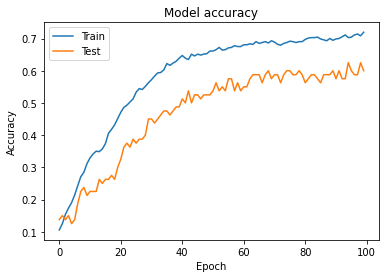

In [189]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

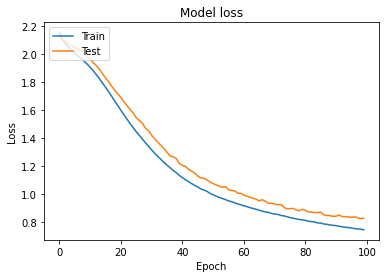

In [190]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

In [142]:
# train, test = train_test_split(df, test_size=0.2)
# train, val = train_test_split(df, test_size=0.2)
# print(len(train), 'train examples')
# print(len(val), 'validation examples')
# print(len(test), 'test examples')

640 train examples
160 validation examples
160 test examples


In [143]:
# def df_to_dataset(dataframe, shuffle=True, batch_size=32):
#     dataframe = dataframe.copy()
#     labels = dataframe.pop('player-id')
#     ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
#     if shuffle:
#         ds = ds.shuffle(buffer_size=len(dataframe))
#     ds = ds.batch(batch_size)
#     return ds

# batch_size = 5 # A small batch sized is used for demonstration purposes
# train_ds = df_to_dataset(train, batch_size=batch_size)
# val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
# test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

In [192]:
# serialize to JSON
json_file = model.to_json()
with open('./neuralnet.json', "w") as file:
    file.write(json_file)
# serialize weights to HDF5
model.save_weights('./model.h5')

In [194]:
from tensorflow.keras.models import model_from_json
# load json and create model
file = open('./neuralnet.json', 'r')
model_json = file.read()
file.close()
loaded_model = model_from_json(model_json)
# load weights
loaded_model.load_weights('./model.h5')

In [195]:
y_pred = loaded_model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))
    
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)
model

Accuracy is: 60.0


In [219]:
input_data = [[-1,2,3,1,0,0,20]]
predictions = model.predict(input_data)
print(np.argmax(predictions, axis=1))

[2]
